<a href="https://colab.research.google.com/github/shivankgoel/TranformersFromScratch/blob/main/1_attention_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
def display_attention_matrix(attention_weights):
  print("Plotting {}".format(attention_weights))
  # Plot the heatmap
  plt.figure(figsize=(8, 6))
  plt.imshow(attention_weights, cmap='viridis', interpolation='nearest')
  plt.colorbar(label='Attention Weight')
  plt.title('Attention Heatmap')
  plt.xlabel('Key Tokens')
  plt.ylabel('Query Tokens')

  # Annotate the heatmap for clarity
  for i in range(attention_weights.shape[0]):
      for j in range(attention_weights.shape[1]):
          plt.text(j, i, f'{attention_weights[i, j]:.2f}', ha='center', va='center', color='white')

  # Display the heatmap
  plt.tight_layout()
  plt.show()

def softmax(x):
  return (np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True))

1.3018479040205766 1.6189523155990804 1.0578510532105294 20.185806169185437 2.523225771148179
[[-0.23801869  0.58409507 -1.94178734 -0.24451144]
 [ 2.89884651  2.97669497 -2.35808705  0.93562659]
 [-0.36907279  0.43570613  1.3209671  -0.73934258]
 [-0.77128336  1.82880855  1.44830824  2.91555047]]
[[ 3.50808971]
 [40.41946006]
 [ 6.46190054]
 [29.40376203]]
Plotting [[0.22467725 0.5112091  0.04089044 0.22322321]
 [0.44912015 0.48548039 0.00234048 0.06305898]
 [0.10699253 0.23925692 0.57986708 0.07388348]
 [0.01572653 0.21175738 0.14474027 0.62777581]]


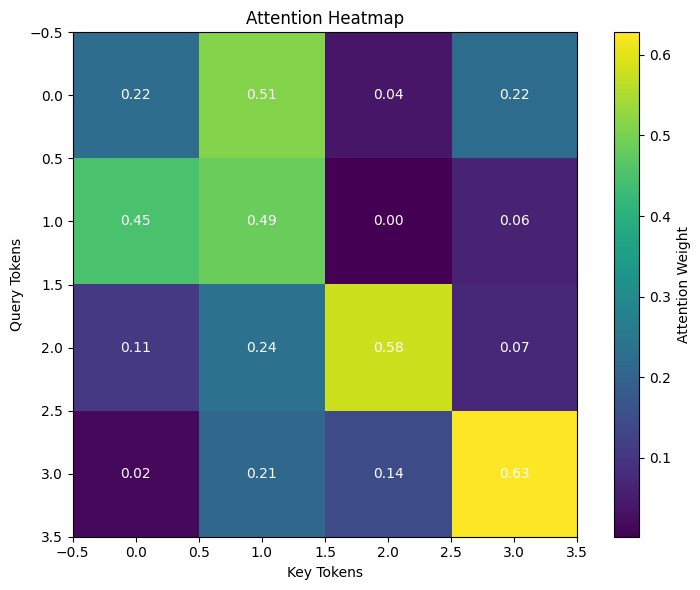

In [49]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

voc_sz, k_sz, q_sz, v_sz = 4, 8, 8 , 10
k = np.random.randn(voc_sz, k_sz)
q = np.random.randn(voc_sz, q_sz)
v = np.random.randn(voc_sz, v_sz)

attention_scores = np.matmul(q, k.T) / math.sqrt(k_sz)

print(q.var(), k.var(), v.var(), (np.matmul(q,k.T)).var(), attention_scores.var())


print(attention_scores)
print(np.sum(np.exp(attention_scores), axis=1, keepdims=True))
display_attention_matrix(softmax(attention_scores))

Plotting [[1.         0.         0.         0.        ]
 [0.48054771 0.51945229 0.         0.        ]
 [0.11552815 0.25834429 0.62612756 0.        ]
 [0.01572653 0.21175738 0.14474027 0.62777581]]


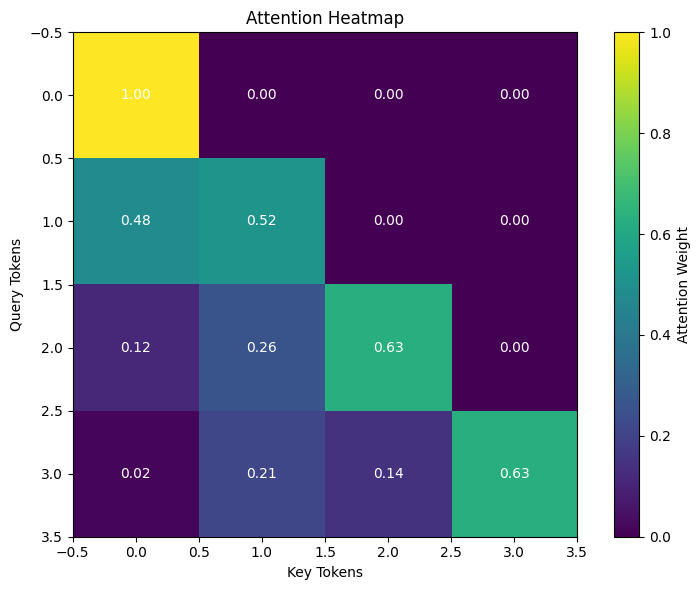

In [50]:
mask = np.tril(np.ones((voc_sz, voc_sz)))
mask[mask == 0] = -np.inf
mask[mask == 1] = 0
display_attention_matrix(softmax(attention_scores +  mask))

In [51]:
def self_attention(q, k, v, mask = False):
  k_sz = k.shape[-1]
  attention_scores = np.matmul(q, k.T) / math.sqrt(k_sz)
  if mask:
    mask = np.tril(np.ones((voc_sz, voc_sz)))
    mask[mask == 0] = -np.inf
    mask[mask == 1] = 0
    attention_scores += mask
  attention_softmax_scores = softmax(attention_scores)
  ans = np.matmul(attention_softmax_scores, v)
  return ans

self_attention(q, k, v, mask = False)

array([[ 0.94739789,  0.69731289, -0.11090801,  0.2866714 ,  0.12837865,
        -0.03700438,  1.07423542,  0.65749649,  0.88202781,  1.23876562],
       [ 0.66452428,  1.08352027,  0.15771083,  0.43709978, -0.01220015,
         0.26149517,  0.54159973,  0.56081728,  1.05544135,  1.49216678],
       [ 0.6329086 ,  0.72586661,  0.89089025,  0.12764346, -0.16343028,
         0.81094321,  1.07457971, -0.27398247,  1.08061001,  0.12217206],
       [ 1.50813996,  0.72657747, -0.26356017,  0.08390192, -0.1642159 ,
        -0.89424667,  0.82140596,  0.52712699,  0.11779076,  0.57904999]])